In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path

# import cv2

In [2]:
# Create dataset and dataloader
class CoordinateDataset(Dataset):
    def __init__(self, data_dir):
        self.data = pd.read_csv(data_dir)
        self.x, self.y = self.__processing()

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx] # Se regresa un registro de datos junto con su etiqueta

    def __len__(self):
        return len(self.data)

    def __processing(self):
        i, o = self.data[['x', 'y']].to_numpy(), self.data[['z','red', 'green', 'blue']].to_numpy()
        return torch.from_numpy(i).float(), torch.from_numpy(o).float()  

PATH_DATASET = 'pool_data_pool_surface.csv'
dataset = CoordinateDataset(PATH_DATASET)
dataloader = DataLoader(dataset, batch_size=128, shuffle=False) 


In [3]:
# Configuration
BATCH_SIZE = 1024
EPOCHS = 100
LEARNING_RATE = 0.001
ROPE_DIM = 128   # Dimension for each coordinate's RoPE embedding
LINEAR_DIM = 256 # Dimension for each linear layer

In [4]:
# def imagenp_open_img(filename:str,BGR2RGB:bool=True) -> np.array:
#     """ Abre una imagen desde un archivo. Soporta caracteres internacionales """
#     f=open(filename,'rb')
#     data=f.read()
#     f.close()
#     data = np.frombuffer(data, np.uint8)
#     img = cv2.imdecode(data,flags=cv2.IMREAD_COLOR)
#     if(BGR2RGB): img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     return img

# def imagenp_show_image(img, figsize=(6,6),title='',normalize01=False, cmap=None):
#     '''Muestra una imagen.
#     image = show_image('../misc/panda.jpg',(15,15))

#     Args:
#         img (str|np.ndarray|PIL.Image.Image): La imagen o ruta del archivo
#         figsize (int,int): Dimensiones de la figura de matplotlib.pyplot
#         title (str): Titulo de la imagen
#         normalize01: Normaliza los datos en el rango [0.0 1.0]
#         cmap: 'gray', 'gray_r', 'Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Set1', 'Set2', 'Set3', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'tab10', 'tab20', 'tab20b', 'tab20c', 'terrain', 'winter'
#     '''
#     if isinstance(img,(str|Path)):
#         if not title: title = str(img)
#         img = imagenp_open_img(img,BGR2RGB=True)

#     # if isinstance(img,(PIL.Image.Image)): img = np.array(img)
        
#     original_shape = img.shape
#     original_dtype = img.dtype
#     mini = np.min(img)
#     maxi = np.max(img)
        
#     if img.shape[-1]<3:
#         img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        
#     # if len(img.shape)==4: img = imagenp_grid_images(img)
        
#     if normalize01 and maxi > mini: img = (img-mini)/(maxi-mini)
    
#     plt.figure(figsize=figsize)
#     title += f" {original_shape} {original_dtype} {mini:.1f} {maxi:.1f}"
#     plt.title(title)
#     plt.imshow(img, cmap=cmap)
#     plt.axis('off')
#     plt.show()
    
# def imagenp_save_image(filename,img, flipBR=True):
#     '''Guarda una imagen en disco.
#     save_image(img, '../misc/panda.jpg')
#     Args:
#         filename (str): Nombre del archivo donde guardar la imagen
#         img (np.ndarray): La imagen.
#     '''
#     if(flipBR) and (img.shape[-1]==3): img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(filename,img)

In [5]:
def pt_module_parameters(module):
    """ Retorna la cantidad de parametros del modulo pytorch """
    pp=0
    for p in list(module.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [6]:
# dataset_image = imagenp_open_img("escultura.jpg")
# imagenp_show_image(dataset_image)

In [7]:
# # Create dataset and dataloader
# class CoordinateDataset(Dataset):
#     def __init__(self, image=None):
#         self.height, self.width, _ = (2048,2048,3) if image is None else image.shape #Si image is None, retorna coordenadas de una imagen de 2048x2048x3
#         x_coords = torch.linspace(0, 1, self.width)
#         y_coords = torch.linspace(0, 1, self.height)
#         x_grid, y_grid = torch.meshgrid(x_coords, y_coords, indexing='xy')        
#         self.coords = torch.stack([x_grid.ravel(), y_grid.ravel()], dim=1)
#         self.rgb = None if image is None else torch.from_numpy(image).float().view(-1, 3)/255

#     def __len__(self):
#         return len(self.coords)

#     def __getitem__(self, idx):
#         if self.rgb is None: return self.coords[idx] #Retorna solo coordenadas
#         return self.coords[idx], self.rgb[idx] #Retorna coordenadas e imagen

In [8]:
# dataset = CoordinateDataset(dataset_image)
# dataloader  = DataLoader(dataset,             batch_size=BATCH_SIZE, shuffle=True)   #Coordenadas desordenadas para entrenamiento
# dataloader2 = DataLoader(dataset,             batch_size=BATCH_SIZE, shuffle=False)  #Coordenadas ordenadas para evaluacion
# dataloader3 = DataLoader(CoordinateDataset(), batch_size=BATCH_SIZE, shuffle=False)  #Coordenadas ordenadas para upsampling 2048x2048

In [9]:
# Rotary Position Embedding (RoPE) module
class RoPE(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim
        inv_freq = torch.logspace(0, 3, dim//2) #Valores que multiplican al angulo van desde 1 a 1000 en escala logaritmica
        self.register_buffer('inv_freq', inv_freq)

    def forward(self, x):
        # x shape: (batch_size, 2) containing (x, y) coordinates
        x_coords = x[:, 0]
        y_coords = x[:, 1]
        
        x_embed = self._embed_single(x_coords)
        y_embed = self._embed_single(y_coords)
        return torch.cat([x_embed, y_embed], dim=1)

    def _embed_single(self, pos):
        # pos shape: (batch_size,)
        angles = pos.unsqueeze(-1) * self.inv_freq.unsqueeze(0)
        sin = torch.sin(angles)
        cos = torch.cos(angles)
        
        # Interleave sin and cos values
        embed = torch.stack([sin, cos], dim=-1)
        return embed.view(embed.size(0), -1)

In [10]:
# Neural network architecture
class ColorNetRope(nn.Module):
    def __init__(self):
        super().__init__()
        self.rope = RoPE(ROPE_DIM)
        self.layers = nn.Sequential(
            nn.Linear(2 * ROPE_DIM, LINEAR_DIM),
            nn.ReLU(),
            nn.Linear(LINEAR_DIM, LINEAR_DIM),
            nn.ReLU(),
            nn.Linear(LINEAR_DIM, LINEAR_DIM),
            nn.ReLU(),
            nn.Linear(LINEAR_DIM, 4),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.rope(x)
        return self.layers(x)
    
# # Neural network architecture
# class ColorNet(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layers = nn.Sequential(
#             nn.Linear(2, LINEAR_DIM),
#             nn.ReLU(),
#             nn.Linear(LINEAR_DIM, LINEAR_DIM),
#             nn.ReLU(),
#             nn.Linear(LINEAR_DIM, LINEAR_DIM),
#             nn.ReLU(),
#             nn.Linear(LINEAR_DIM, 3),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         return self.layers(x)

In [11]:
# Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = ColorNet().to(device)
model = ColorNetRope().to(device)
criterion = nn.MSELoss()

optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS, eta_min=LEARNING_RATE*0.1)

print(f"Model Parameters: {pt_module_parameters(model)}")

Model Parameters: 198404


In [12]:
# train_loss = []
# for epoch in range(EPOCHS):
#     epoch_loss = 0.0
#     for inputs, targets in dataloader:
#         inputs, targets = inputs.to(device), targets.to(device)
        
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()
        
#         epoch_loss += loss.item() * inputs.size(0)
    
#     scheduler.step()
#     epoch_loss /= len(dataset)
#     train_loss.append(epoch_loss)
#     print(f'Epoch {epoch+1}/{EPOCHS} - Loss: {epoch_loss:.6f} LR: {scheduler.get_last_lr()[0]:.6f}')

In [13]:
# Training loop
train_loss = []
for epoch in range(EPOCHS):
    epoch_loss = 0.0
    progress_bar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{EPOCHS}', leave=False)
    for inputs, targets in progress_bar:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)
        progress_bar.set_postfix(loss=loss.item(), lr=scheduler.get_last_lr()[0])
    scheduler.step()
    epoch_loss /= len(dataset)
    train_loss.append(epoch_loss)
    print(f'Epoch {epoch+1}/{EPOCHS} - Loss: {epoch_loss:.6f} LR: {scheduler.get_last_lr()[0]:.6f}')

Epoch 1/100 - Loss: 23516.400793 LR: 0.001000


Epoch 2/100 - Loss: 23515.726524 LR: 0.000999


Epoch 3/100 - Loss: 23515.726477 LR: 0.000998


Epoch 4/100 - Loss: 23515.726477 LR: 0.000996


Epoch 5/100 - Loss: 23515.726477 LR: 0.000994


Epoch 6/100 - Loss: 23515.726477 LR: 0.000992


Epoch 7/100 - Loss: 23515.726477 LR: 0.000989


Epoch 8/100 - Loss: 23515.726477 LR: 0.000986


Epoch 9/100 - Loss: 23515.726477 LR: 0.000982


Epoch 10/100 - Loss: 23515.726477 LR: 0.000978


Epoch 11/100 - Loss: 23515.726477 LR: 0.000973


Epoch 12/100 - Loss: 23515.726477 LR: 0.000968


Epoch 13/100 - Loss: 23515.726477 LR: 0.000963


Epoch 14/100 - Loss: 23515.726477 LR: 0.000957


Epoch 15/100 - Loss: 23515.726477 LR: 0.000951


Epoch 16/100 - Loss: 23515.726481 LR: 0.000944


Epoch 17/100 - Loss: 23515.726477 LR: 0.000937


Epoch 18/100 - Loss: 23515.726477 LR: 0.000930


Epoch 19/100 - Loss: 23515.726477 LR: 0.000922


Epoch 20/100 - Loss: 23515.726477 LR: 0.000914


Epoch 21/100 - Loss: 23515.726477 LR: 0.000906


Epoch 22/100 - Loss: 23515.726477 LR: 0.000897


Epoch 23/100 - Loss: 23515.726477 LR: 0.000888


Epoch 24/100 - Loss: 23515.726477 LR: 0.000878


Epoch 25/100 - Loss: 23515.726477 LR: 0.000868


Epoch 26/100 - Loss: 23515.726477 LR: 0.000858


Epoch 27/100 - Loss: 23515.726477 LR: 0.000848


Epoch 28/100 - Loss: 23515.726477 LR: 0.000837


Epoch 29/100 - Loss: 23515.726477 LR: 0.000826


Epoch 30/100 - Loss: 23515.726477 LR: 0.000815


Epoch 31/100 - Loss: 23515.726477 LR: 0.000803


Epoch 32/100 - Loss: 23515.726477 LR: 0.000791


Epoch 33/100 - Loss: 23515.726477 LR: 0.000779


Epoch 34/100 - Loss: 23515.726477 LR: 0.000767


Epoch 35/100 - Loss: 23515.726477 LR: 0.000754


Epoch 36/100 - Loss: 23515.726477 LR: 0.000742


Epoch 37/100 - Loss: 23515.726477 LR: 0.000729


Epoch 38/100 - Loss: 23515.726477 LR: 0.000716


Epoch 39/100 - Loss: 23515.726477 LR: 0.000702


Epoch 40/100 - Loss: 23515.726477 LR: 0.000689


Epoch 41/100 - Loss: 23515.726477 LR: 0.000676


Epoch 42/100 - Loss: 23515.726477 LR: 0.000662


Epoch 43/100 - Loss: 23515.726477 LR: 0.000648


Epoch 44/100 - Loss: 23515.726477 LR: 0.000634


Epoch 45/100 - Loss: 23515.726477 LR: 0.000620


Epoch 46/100 - Loss: 23515.726477 LR: 0.000606


Epoch 47/100 - Loss: 23515.726477 LR: 0.000592


Epoch 48/100 - Loss: 23515.726477 LR: 0.000578


Epoch 49/100 - Loss: 23515.726477 LR: 0.000564


Epoch 50/100 - Loss: 23515.726477 LR: 0.000550


Epoch 51/100 - Loss: 23515.726477 LR: 0.000536


Epoch 52/100 - Loss: 23515.726477 LR: 0.000522


Epoch 53/100 - Loss: 23515.726477 LR: 0.000508


Epoch 54/100 - Loss: 23515.726477 LR: 0.000494


Epoch 55/100 - Loss: 23515.726477 LR: 0.000480


Epoch 56/100 - Loss: 23515.726477 LR: 0.000466


Epoch 57/100 - Loss: 23515.726477 LR: 0.000452


Epoch 58/100 - Loss: 23515.726477 LR: 0.000438


Epoch 59/100 - Loss: 23515.726477 LR: 0.000424


Epoch 60/100 - Loss: 23515.726477 LR: 0.000411


Epoch 61/100 - Loss: 23515.726477 LR: 0.000398


Epoch 62/100 - Loss: 23515.726477 LR: 0.000384


Epoch 63/100 - Loss: 23515.726477 LR: 0.000371


Epoch 64/100 - Loss: 23515.726477 LR: 0.000358


Epoch 65/100 - Loss: 23515.726477 LR: 0.000346


Epoch 66/100 - Loss: 23515.726477 LR: 0.000333


Epoch 67/100 - Loss: 23515.726477 LR: 0.000321


Epoch 68/100 - Loss: 23515.726477 LR: 0.000309


Epoch 69/100 - Loss: 23515.726477 LR: 0.000297


Epoch 70/100 - Loss: 23515.726477 LR: 0.000285


Epoch 71/100 - Loss: 23515.726477 LR: 0.000274


Epoch 72/100 - Loss: 23515.726477 LR: 0.000263


Epoch 73/100 - Loss: 23515.726477 LR: 0.000252


Epoch 74/100 - Loss: 23515.726477 LR: 0.000242


Epoch 75/100 - Loss: 23515.726477 LR: 0.000232


Epoch 76/100 - Loss: 23515.726477 LR: 0.000222


Epoch 77/100 - Loss: 23515.726477 LR: 0.000212


Epoch 78/100 - Loss: 23515.726477 LR: 0.000203


Epoch 79/100 - Loss: 23515.726477 LR: 0.000194


Epoch 80/100 - Loss: 23515.726477 LR: 0.000186


Epoch 81/100 - Loss: 23515.726477 LR: 0.000178


Epoch 82/100 - Loss: 23515.726477 LR: 0.000170


Epoch 83/100 - Loss: 23515.726477 LR: 0.000163


Epoch 84/100 - Loss: 23515.726477 LR: 0.000156


Epoch 85/100 - Loss: 23515.726477 LR: 0.000149


Epoch 86/100 - Loss: 23515.726477 LR: 0.000143


Epoch 87/100 - Loss: 23515.726477 LR: 0.000137


Epoch 88/100 - Loss: 23515.726477 LR: 0.000132


Epoch 89/100 - Loss: 23515.726477 LR: 0.000127


Epoch 90/100 - Loss: 23515.726477 LR: 0.000122


Epoch 91/100 - Loss: 23515.726477 LR: 0.000118


Epoch 92/100 - Loss: 23515.726477 LR: 0.000114


Epoch 93/100 - Loss: 23515.726477 LR: 0.000111


Epoch 94/100 - Loss: 23515.726477 LR: 0.000108


Epoch 95/100 - Loss: 23515.726477 LR: 0.000106


Epoch 96/100 - Loss: 23515.726477 LR: 0.000104


Epoch 97/100 - Loss: 23515.726477 LR: 0.000102


Epoch 98/100 - Loss: 23515.726477 LR: 0.000101


Epoch 99/100 - Loss: 23515.726477 LR: 0.000100


Epoch 100/100 - Loss: 23515.726477 LR: 0.000100


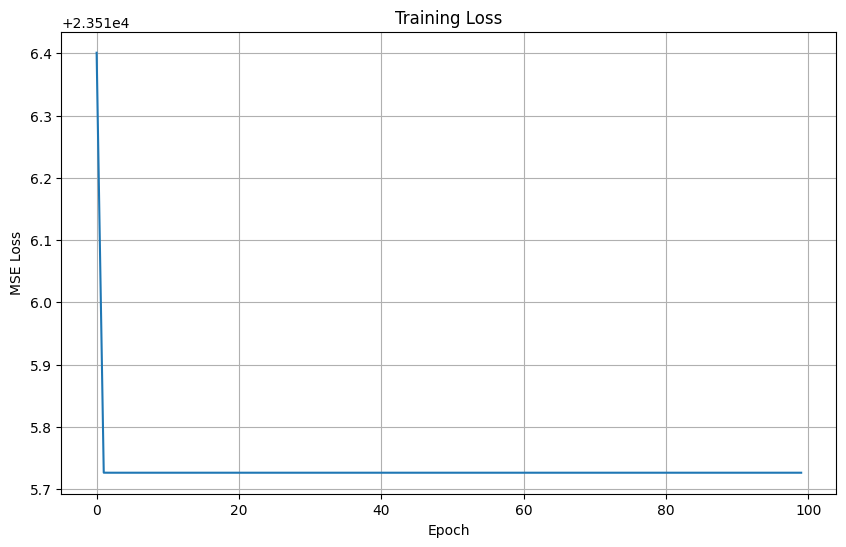

In [14]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

In [15]:
# # Calculate final metrics
# with torch.no_grad():
#     model.eval()
#     all_outputs = []
#     all_targets = []
    
#     for inputs, targets in dataloader2:
#         inputs = inputs.to(device)
#         outputs = model(inputs)
#         all_outputs.append(outputs.cpu())
#         all_targets.append(targets.cpu())
    
#     outputs = torch.cat(all_outputs)
#     targets = torch.cat(all_targets)
    
#     # Calculate MSE and PSNR
#     mse = criterion(outputs, targets)
#     psnr = 20 * torch.log10(torch.tensor(1.0)) - 10 * torch.log10(mse)
    
#     print(f'\nFinal Metrics:')
#     print(f'MSE: {mse.item():.6f}')
#     print(f'PSNR: {psnr.item():.2f} dB')



NameError: name 'dataloader2' is not defined

In [ ]:
# # Visualize results
# with torch.no_grad():
#     predicted_image = outputs.view(dataset_image.shape[-3], dataset_image.shape[-2], dataset_image.shape[-1]).numpy()

# fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# ax[0].imshow(dataset_image)
# ax[0].set_title('Original Image')
# ax[1].imshow(predicted_image)
# ax[1].set_title('Predicted Image')
# plt.show()

In [ ]:
# # Calculate final metrics
# with torch.no_grad():
#     model.eval()
#     all_2k = []
    
#     for inputs in dataloader3:
#         inputs = inputs.to(device)
#         outputs = model(inputs)
#         all_2k.append(outputs.cpu())
    
#     outputs = torch.cat(all_2k)
#     predicted_image = outputs.view(2048, 2048, 3).numpy()
    
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# ax[0].imshow(dataset_image)
# ax[0].set_title('Original Image')
# ax[1].imshow(predicted_image)
# ax[1].set_title('Upscaled Image')
# plt.show()
    
    